In [ ]:
import pandas as pd
import numpy as np

In [ ]:
document_df = pd.read_csv('all_movies_doc-movie-index-director.csv', lineterminator='\n')

In [ ]:
document_df.head()

,movieId,tmdb_id,document
0,0,9383,Paul Verhoeven Rhona Mitra Elisabeth Shue Kevi...
1,1,10480,Neil LaBute Morgan Freeman Renée Zellweger All...
2,2,10384,Walter Hill James Spader Robin Tunney Angela B...
3,3,14181,Ben Younger Ben Affleck Vin Diesel Giovanni Ri...
4,4,2787,David Twohy Vin Diesel Claudia Black Keith Dav...


In [ ]:
document_df[document_df['movieId']==1].document.values

array(["Neil LaBute Morgan Freeman Renée Zellweger Allison Janney James Flamberg John C. Richards Neil LaBute IMF Internationale Medien und Film GmbH & Co. Produktions KG Gramercy Pictures Propaganda Films ab'-strakt Pictures Universal Pictures What happens when a person decides that life is merely a state of mind? If you're Betty, a small-town waitress and soap opera fan from Fair Oaks, Kansas, you refuse to believe that you can't be with the love of your life just because he doesn't really exist. After all, life is no excuse for not living. Traumatized by a savage event, Betty enters into a fugue state that allows -- even encourages -- her to keep functioning... in a kind of alternate reality. Comedy Crime Drama Romance Thriller Greg Kinnear Chris Rock bartender heart specialist native american nurse uniform soap opera tv production used car dealer violence writer prospect preferred Aaron Eckhart dark comedy dark comedy Neil LaBute Morgan Freeman Renee Zellweger nurse renee z Morgan 

In [ ]:
len(document_df.index.tolist())

21639

In [ ]:
document_df.index.tolist()(21639, 13804)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    ngram_range=(0, 1),
    min_df=0.0004,
    stop_words='english')
tfidf_matrix = tfidf.fit_transform(document_df['document'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=document_df.index.tolist())
print(tfidf_df.shape)
tfidf_df.head(10)

(21639, 16049)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,16009,16010,16011,16012,16013,16014,16015,16016,16017,16018,16019,16020,16021,16022,16023,16024,16025,16026,16027,16028,16029,16030,16031,16032,16033,16034,16035,16036,16037,16038,16039,16040,16041,16042,16043,16044,16045,16046,16047,16048
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from autoencoder_script import AutoEncoder

In [ ]:
ae = AutoEncoder(tfidf_df, validation_perc=0.1, lr=1e-3, intermediate_size=5000, encoded_size=100)

In [ ]:
ae.train_loop(epochs=30, print_every_n_batches = 100)

Epoch 1/30
train loss: 0.22461112 | validation loss: 0.24718542)
train loss: 0.20764281 | validation loss: 0.21009885)
train loss: 0.20038484 | validation loss: 0.18457045)
Epoch 2/30
train loss: 0.16640075 | validation loss: 0.13429751)
train loss: 0.13950023 | validation loss: 0.1362458)
train loss: 0.14247139 | validation loss: 0.12683089)
Epoch 3/30
train loss: 0.11647551 | validation loss: 0.09944908)
train loss: 0.10045497 | validation loss: 0.09503765)
train loss: 0.10170248 | validation loss: 0.09029003)
Epoch 4/30
train loss: 0.09381647 | validation loss: 0.07438369)
train loss: 0.09076315 | validation loss: 0.06733393)
train loss: 0.07030682 | validation loss: 0.05968804)
Epoch 5/30
train loss: 0.07288772 | validation loss: 0.05240674)
train loss: 0.06881982 | validation loss: 0.04845029)
train loss: 0.05511977 | validation loss: 0.04580766)
Epoch 6/30
train loss: 0.05079758 | validation loss: 0.04166818)
train loss: 0.05877485 | validation loss: 0.04219915)
train loss: 0.062

In [ ]:
losses = pd.DataFrame(data=list(zip(ae.train_losses, ae.val_losses)), columns=['train_loss', 'validation_loss'])
losses['epoch'] = (losses.index + 1) / 3

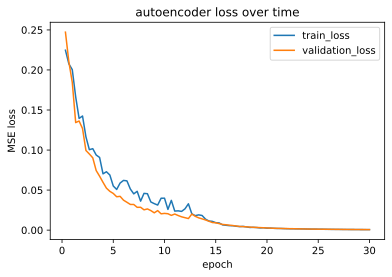

In [ ]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
fig, ax = plt.subplots()
ax.plot(losses['epoch'], losses['train_loss'])
ax.plot(losses['epoch'], losses['validation_loss'])
ax.set_ylabel('MSE loss')
ax.set_xlabel('epoch')
ax.set_title('autoencoder loss over time')
# ax.legend()
plt.legend(['train_loss', 'validation_loss'], loc='upper right')
plt.show()

In [ ]:
encoded = ae.get_encoded_representations()
encoded.shape

(21639, 100)

In [ ]:
encoded[:10, :10]

array([[0.        , 0.        , 0.        , 0.878551  , 0.01713177,
        1.4587812 , 0.06792153, 0.        , 0.        , 0.03787074],
       [0.        , 0.        , 0.        , 0.18664019, 0.        ,
        0.17158264, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.718222  , 0.4463364 ,
        1.569172  , 0.        , 0.        , 0.        , 0.1258986 ],
       [0.        , 0.        , 0.        , 1.262108  , 0.5126159 ,
        0.41268653, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.87745506, 0.6772346 ,
        1.2736362 , 0.        , 0.        , 0.        , 0.35799214],
       [0.        , 0.        , 0.        , 1.0519258 , 0.1105079 ,
        0.65012217, 0.24015062, 0.        , 0.        , 0.6069424 ],
       [0.        , 0.        , 0.        , 0.7682782 , 0.6557548 ,
        0.5058266 , 0.64467216, 0.        , 0.        , 0.7052222 ],
       [0.        , 0.        , 0.       

In [ ]:
import pickle
with open('autoencoder_embeddings-movie-index-director_2.pkl', 'wb') as fh:
    pickle.dump(encoded, fh)